### Ex6.1
Vector を継承した　Vec3クラスを実装せよ。

In [3]:
from abc import ABCMeta, abstractmethod

class Vector(metaclass=ABCMeta):
    @abstractmethod
    def scale(self,scalar):
        pass
    @abstractmethod
    def add(self,other):
        pass
    def __mul__(self, scalar):
        return self.scale(scalar)
    def __rmul__(self, scalar):
        return self.scale(scalar)
    def __add__(self,other):
        return self.add(other)

In [4]:
# あまりピンとこなかったので、本を見て写経した。
class Vec3(Vector):
    def __init__(self, x, y, z) -> None:
        self.x = x
        self.y = y
        self.z = z

    def scale(self, scalar):
        return Vec3(self.x * scalar, self.y * scalar, self.z * scalar)

    def add(self, other):
        return Vec3(self.x + other.x, self.y + other.y, self.z + other.z)

    def __eq__(self, other):
        return (self.x == other.x and self.y == other.y and self.z == other.z)

    def __repr__(self):
        return "Vec3({},{},{})".format(self.x, self.y, self.z)

vec = Vec3(1,2,3)
print(vec)

Vec3(1,2,3)


### Ex6.2
Vector を継承し、次元を表す抽象プロパティを持つ CoordinateVector クラスを実装せよ。
これにより、特定の座標ベクトルクラスを実装する際の繰り返し作業を省くことができる。
CoorinateVector から継承し、次元を6に設定するだけで、Vec6クラスを実装することができるようになる。

In [5]:
# 自分の間違った解答
class CoordinateVector(Vector):
    def __init__(self, dimension, vector) -> None:
        self.dimension = dimension
        self.vector = vector

    def scale(self, scalar):
        return CoordinateVector(self.dimension, (elem * scalar for elem in self.vector))

    def add(self, other):
        return CoordinateVector(self.dimension, (elem + other_elem for (elem, other_elem) in zip(self.vector, other.vector)))

In [6]:
# 本に記載の回答
from abc import abstractproperty
from vectors import add, scale

class CoordinateVector(Vector):
    @abstractproperty
    def dimension(self):
        pass

    def __init__(self, *coordinates):
        self.coordinates = tuple(x for x in coordinates)

    def add(self, other):
        return self.__class__(*add(self.coordinates, other.coordinates))

    def scale(self, scalar):
        return self.__class__(*scale(scalar, self.coordinates))

    def __repr__(self) -> str:
        return "{}{}".format(self.__class__.__qualname__, self.coordinates)

class Vec6(CoordinateVector):
    def dimension(self):
        return 6

print(Vec6(1,2,3,4,5,6) + Vec6(1,2,3,4,5,6))


Vec6(2, 4, 6, 8, 10, 12)


### Ex6.3
抽象メソッドzeroと、反転演算子を Vector クラスに実装せよ。zeroメソッドは
与えられたベクトル空間のゼロベクトルを返す。ベクトル空間内でのゼロベクトルと任意のベクトルの反転は必要になるので、これがあると便利である。

In [7]:
from abc import ABCMeta, abstractmethod, abstractproperty

class Vector(metaclass=ABCMeta):
    @abstractmethod
    def scale(self,scalar):
        pass
    @abstractmethod
    def add(self,other):
        pass
    def __mul__(self, scalar):
        return self.scale(scalar)
    def __rmul__(self, scalar):
        return self.scale(scalar)
    def __add__(self,other):
        return self.add(other)
    @classmethod
    @abstractproperty
    def zero():
        pass
    def __neg__(self):
        return self.scale(-1)

### Ex6.4
Vec3に対する加算とスカラー倍がベクトル空間の特性を満たすことを示す単体テストを書け

In [8]:
# ベクトル空間の特性というと p221～p222に定義が記載されている。加算についての特性と、スカラー倍についての特性。
# p224~p225に2次元の場合について記載があるから同様にやればよさそうだ
from random import uniform
from math import isclose

def random_scalar():
    return uniform(-10,10)

def random_vec3():
    return Vec3(random_scalar(),random_scalar(),random_scalar())

def approx_equal_vec3(v,w):
    return isclose(v.x, w.x) and isclose(v.y, w.y) and isclose(v.z, w.z)

def test(eq, a, b, u, v, w):
    assert eq(u + v, v + u)
    assert eq(u + (v + w), (u + v) + w)
    assert eq(a * (b * v), (a * b) * v)
    assert eq(1 * v, v)
    assert eq((a + b) * v, a * v + b * v)
    assert eq(a * v + a * w, a * (v + w))

for i in range(0,100):
    a,b = random_scalar(), random_scalar()
    u,v,w = random_vec3(), random_vec3(), random_vec3()
    test(approx_equal_vec3,a,b,u,v,w)

### Ex6.5
任意のベクトルvについて、0ベクトル+v=v、0・v=0ベクトル、および -v+v=0ベクトルであることを確認する単体テストを追加せよ。

In [9]:
# まずは zeroメソッドを追加した Vec3 を定義
class Vec3(Vector):
    def __init__(self, x, y, z) -> None:
        self.x = x
        self.y = y
        self.z = z

    def scale(self, scalar):
        return Vec3(self.x * scalar, self.y * scalar, self.z * scalar)

    def add(self, other):
        return Vec3(self.x + other.x, self.y + other.y, self.z + other.z)

    def __eq__(self, other):
        return (self.x == other.x and self.y == other.y and self.z == other.z)

    def __repr__(self):
        return "Vec3({},{},{})".format(self.x, self.y, self.z)

    def zero():
        return Vec3(0,0,0)


def test_zero_vec(eq, zero_vec, v):
    assert eq(zero_vec + v, v)
    assert eq(0 * v, zero_vec)
    assert eq(-v + v, zero_vec)

for i in range(0,100):
    v = random_vec3()
    test_zero_vec(approx_equal_vec3, Vec3.zero(),v)


### Ex6.6
Vec2とVec3に等価演算が実装されているので、Vec2(1,2)==Vec3(1,2,3)はTrueを返してしまう。
ベクトルの等しさをテストする前にクラスが同じかどうかのチェックを追加することで、これを修正せよ。

In [10]:
from abc import ABCMeta, abstractmethod, abstractproperty

# 派生クラスでは基底クラスの __eq__ と合わせて自身のチェックを行う
class Vec3(Vector):
    def __init__(self, x, y, z) -> None:
        self.x = x
        self.y = y
        self.z = z

    def scale(self, scalar):
        return Vec3(self.x * scalar, self.y * scalar, self.z * scalar)

    def add(self, other):
        return Vec3(self.x + other.x, self.y + other.y, self.z + other.z)

    def __eq__(self, other):
        return (type(self) == type(other)) and (self.x == other.x and self.y == other.y and self.z == other.z)

    def __repr__(self):
        return "Vec3({},{},{})".format(self.x, self.y, self.z)

    def zero():
        return Vec3(0,0,0)

class Vec2(Vector):
    def __init__(self,x,y):
        self.x = x
        self.y = y
    def add(self,other):
        return Vec2(self.x + other.x, self.y + other.y)
    def scale(self,scalar):
        return Vec2(scalar * self.x, scalar * self.y)
    def __eq__(self,other):
        return (type(self) == type(other)) and self.x == other.x and self.y == other.y
    def __repr__(self):
        return "Vec2({},{})".format(self.x, self.y)
    def zero():
        return Vec2(0,0,0)

def test_eq_2d_3d():
    assert False==(Vec2(1,2)==Vec3(1,2,3))

test_eq_2d_3d()

### Ex6.7
ベクトルをスカラーで割ることができる__truediv__関数を Vector に実装せよ。
ベクトルは、ベクトルにスカラーの逆数(1.0/スカラー)を乗算することで、0ではないスカラーで割ることができる。

In [11]:
from abc import ABCMeta, abstractmethod, abstractproperty

class Vector(metaclass=ABCMeta):
    @abstractmethod
    def scale(self,scalar):
        pass
    @abstractmethod
    def add(self,other):
        pass
    def __mul__(self, scalar):
        return self.scale(scalar)
    def __rmul__(self, scalar):
        return self.scale(scalar)
    def __add__(self,other):
        return self.add(other)
    @classmethod
    @abstractproperty
    def zero():
        pass
    def __neg__(self):
        return self.scale(-1)

    def __truediv__(self, scalar):
        return self.scale(1.0 / scalar)

class Vec3(Vector):
    def __init__(self, x, y, z) -> None:
        self.x = x
        self.y = y
        self.z = z

    def scale(self, scalar):
        return Vec3(self.x * scalar, self.y * scalar, self.z * scalar)

    def add(self, other):
        return Vec3(self.x + other.x, self.y + other.y, self.z + other.z)

    def __eq__(self, other):
        return (type(self) == type(other)) and (self.x == other.x and self.y == other.y and self.z == other.z)

    def __repr__(self):
        return "Vec3({},{},{})".format(self.x, self.y, self.z)

    def zero():
        return Vec3(0,0,0)

assert (Vec3(2,4,6) / 2) == Vec3(1,2,3)

### Ex6.8
Vectorクラスを継承するオブジェクトではなく、浮動小数点数のu,v,wでベクトル空間の単体テストを実行せよ。これにより、実数が本当にベクトルであることが実証できる。

In [12]:
from random import uniform
from math import isclose

def random_scalar():
    return uniform(-10,10)

def random_vec3():
    return Vec3(random_scalar(),random_scalar(),random_scalar())

def approx_equal(v,w):
    return isclose(v, w)

def test(eq, a, b, u, v, w):
    assert eq(u + v, v + u)
    assert eq(u + (v + w), (u + v) + w)
    assert eq(a * (b * v), (a * b) * v)
    assert eq(1 * v, v)
    assert eq((a + b) * v, a * v + b * v)
    assert eq(a * v + a * w, a * (v + w))

for i in range(0,100):
    a,b = random_scalar(), random_scalar()
    u,v,w = random_scalar(), random_scalar(), random_scalar()
    test(approx_equal,a,b,u,v,w)

### Ex6.9
CarForSale用のベクトル空間の単体テストを実行して、そのオブジェクトがベクトル空間を形成していることを示せ(文字列プロパティは無視してよい)。

In [14]:
# 面倒なので飛ばす

### Ex6.10
1変数関数を引数に取るコンストラクタを持つクラス Function(Vector)を実装し、関数として扱えるように__call__メソッドを実装せよ。
これにより、plot([f,g,f+g,3*g],-10,10)が実行できるはずである。

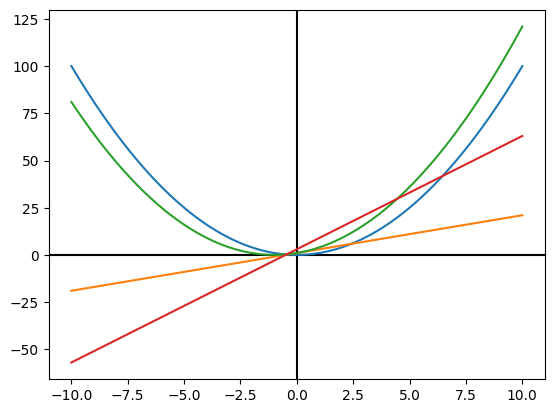

In [26]:
from typing import Any

# plotting utility function for functions in this chapter
import numpy as np
import matplotlib.pyplot as plt
from math import sin

def plot(fs, xmin, xmax):
    xs = np.linspace(xmin,xmax,100)
    fig, ax = plt.subplots()
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    for f in fs:
        ys = [f(x) for x in xs]
        plt.plot(xs,ys)

def func0(x):
    return 0

class Function(Vector):
    def __init__(self, func):
        self.func = func

    def scale(self,scalar):
        def new_function(x):
            return self.func(x) * scalar
        return Function(new_function)

    def add(self,other):
        def new_function(x):
            return self.func(x) + other.func(x)
        return Function(new_function)
    @classmethod
    def zero():
        return Function(func0)

    def __call__(self, *args: Any, **kwds: Any):
        return self.func(args[0])

def func1(x):
    return x * x

def func2(x):
    return 2 * x + 1

f = Function(func1)
g = Function(func2)

# plot([f],-10,10)
# plot([f,g],-10,10)
# plot([f,g,f+g],-10,10)
plot([f,g,f+g,3*g],-10,10)


### Ex6.12
Functionクラスを単体テストして、関数がベクトル空間の特性を満たすことを実証せよ。

In [ ]:
def test(zero, eq, a, b, u, v, w):
    assert eq(u + v, v + u)
    assert eq(u + (v + w), (u + v) + w)
    assert eq(a * (b * v), (a * b) * v)
    assert eq(1 * v, v)
    assert eq((a + b) * v, a * v + b * v)
    assert eq(a * v + a * w, a * (v + w))
    assert eq(zero + v, v)
    assert eq(0 * v, zero)
    assert eq(-v + v, zero)

def approx_equal(v,w):
    return isclose(v,w)

for i in range(0,100):
    a,b = random_scalar(), random_scalar()
    # テストに渡すu,v,wは Function を渡すはず。だが、Function を渡してもパラメータを渡さないと、
    # 関数の値が定まらない... x の値も渡すのかな？分からず、答え見た。
    u,v,w = random_xxx(), random_xxx(), random_xxx()
    test(Function.zero(), approx_equal,a,b,u,v,w)

### Ex6.13
f(x,y)=x+yのような2変数関数を扱うクラスFunciton2(Vector)を実装せよ。

In [30]:
class Function2(Vector):
    def __init__(self, func):
        self.func = func

    def scale(self,scalar):
        def new_function(x,y):
            return self.func(x,y) * scalar
        return Function2(new_function)

    def add(self,other):
        def new_function(x,y):
            return self.func(x,y) + other.func(x,y)
        return Function2(new_function)

    @classmethod
    def zero():
        return Function2(lambda x,y: 0)

    def __call__(self, *args: Any, **kwds: Any):
        return self.func(args[0], args[1])

f = Function2(lambda x,y:x+y)
g = Function2(lambda x,y:x-y+1)
(f+g)(3,10)

7

### Ex6.14
9×9行列のベクトル空間の次元を求めよ。

A. dの81